<div style="background-color:#ede7f6; padding:12px; border-radius:8px;">
    <h2 style="color:#4527a0;">🍇 1. Importing Libraries</h2>
    <p style="font-size:15px; color:#311b92;">
        We will import all necessary libraries for:
        <ul>
            <li>📂 Data handling</li>
            <li>🖼️ Image processing</li>
            <li>🎨 Data augmentation</li>
            <li>📊 Visualization</li>
        </ul>
    </p>
</div>

In [25]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np

<div style="background-color:#fffde7; padding:12px; border-radius:8px;">
    <h2 style="color:#f9a825;">🍋 2. Load the Dataset</h2>
    <p style="font-size:15px; color:#f57f17;">
        We will load the fruit images from the dataset directory.
        The dataset should have subfolders for each fruit class.
    </p>
</div>

In [2]:
# Path to dataset
dataset_path = "FRUIT-16K"  # Change this to your dataset path

# Check available classes
classes = os.listdir(dataset_path)
print(f"Found {len(classes)} classes: {classes}")


Found 16 classes: ['F_Banana', 'F_Lemon', 'F_Lulo', 'F_Mango', 'F_Orange', 'F_Strawberry', 'F_Tamarillo', 'F_Tomato', 'S_Banana', 'S_Lemon', 'S_Lulo', 'S_Mango', 'S_Orange', 'S_Strawberry', 'S_Tamarillo', 'S_Tomato']


<div style="background-color:#fce4ec; padding:12px; border-radius:8px;">
    <h2 style="color:#ad1457;">🍓 3. Data Augmentation</h2>
    <p style="font-size:15px; color:#880e4f;">
        We will improve model generalization by applying:
        <ul>
            <li>🔄 Random flips</li>
            <li>🔄 Random rotations</li>
            <li>🎨 Color jitter</li>
            <li>📏 Resizing</li>
        </ul>
    </p>
</div>

In [5]:
# Define transformations
transform_train = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset with transformations
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform_train)

<div style="background-color:#fff3e0; padding:12px; border-radius:8px;">
    <h2 style="color:#ef6c00;">🍊 4. Dataset Splitting</h2>
    <p style="font-size:15px; color:#e65100;">
        We will split the dataset into:
        <ul>
            <li>📚 <b>Training set</b> – 70%</li>
            <li>📏 <b>Validation set</b> – 15%</li>
            <li>🧪 <b>Test set</b> – 15%</li>
        </ul>
        A random seed will be set for reproducibility.
    </p>
</div>

In [6]:
# Set seed for reproducibility
torch.manual_seed(42)

# Calculate split sizes
train_size = int(0.7 * len(full_dataset))
val_size   = int(0.15 * len(full_dataset))
test_size  = len(full_dataset) - train_size - val_size

# Perform dataset split
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])
val_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Summary
print(f"Train: {len(train_dataset)} images in {len(train_loader)} batches")
print(f"Validation: {len(val_dataset)} images in {len(val_loader)} batches")
print(f"Test: {len(test_dataset)} images in {len(test_loader)} batches")

Train: 11200 images in 350 batches
Validation: 2400 images in 75 batches
Test: 2400 images in 75 batches


<div style="background-color:#ffebee; padding:12px; border-radius:8px;">
    <h2 style="color:#b71c1c;">🍅 5. Data Visualization</h2>
    <p style="font-size:15px; color:#880e4f;">
        We will display a sample of images from the training set
        to verify augmentations and data loading.
    </p>
</div>

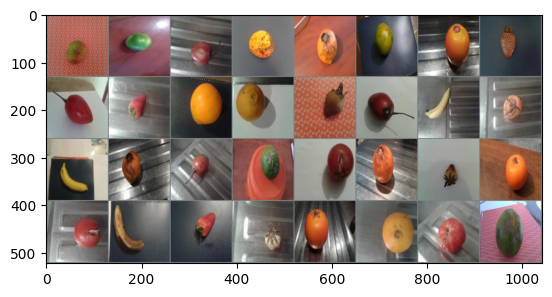

In [10]:
import torchvision

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

<div style="background-color:#fff3e0; padding:12px; border-radius:8px;">
    <h2 style="color:#e65100;">🥭 6. Next Steps</h2>
    <p style="font-size:15px; color:#bf360c;">
        In the next phase, we will:
        <ul>
            <li>🛠 Build the CNN model</li>
            <li>📈 Train on the training set</li>
            <li>📊 Evaluate performance</li>
            <li>🔌 Deploy in conveyor belt inspection system</li>
        </ul>
    </p>
</div>

<h2 style="color:#ff6600;">🍇 Model Training & Validation – FreshHarvest AI</h2>

Welcome to the heart of our AI pipeline!
Here, we will **train our Convolutional Neural Network (CNN)** to classify the freshness of 8 fruit and vegetable categories:

🍌 Banana 🍋 Lemon 🍈 Lulo 🥭 Mango 🍊 Orange 🍓 Strawberry 🍅 Tomato 🍅 Tamarillo

---

**🔹 Objectives:**
- Build a custom CNN model (No transfer learning yet 🚫).
- Train & validate to achieve **>90% accuracy**.
- Evaluate on **test dataset** for final performance.
- Experiment with **epochs & hyperparameters** for optimization.

---

<p style="color:#ff0000;">💡 Tip:</p>
Keep an eye on validation accuracy to prevent overfitting.
Our goal is to strike the perfect balance between **performance** and **generalization**.

In [14]:
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.4),  # Regularization
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [15]:
# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(full_dataset.classes)
model = CNNModel(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

In [16]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20, patience=5):
    best_val_acc = 0
    patience_counter = 0
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        # TRAINING
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        for batch_idx, (inputs, targets) in enumerate(train_loader, start=1):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

            # Print training loss every 10 batches
            if batch_idx % 10 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}")

        train_acc = 100 * correct / total
        train_losses.append(running_loss / len(train_loader))

        # VALIDATION
        model.eval()
        val_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()

        val_acc = 100 * correct / total
        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch [{epoch+1}/{epochs}] | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

        # EARLY STOPPING
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "models/best_model.pth")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    return train_losses, val_losses

In [17]:
# Run Training with Epoch Optimization
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10)

Epoch [1/10], Batch [10/350], Loss: 6.3603
Epoch [1/10], Batch [20/350], Loss: 2.0124
Epoch [1/10], Batch [30/350], Loss: 2.3795
Epoch [1/10], Batch [40/350], Loss: 2.4400
Epoch [1/10], Batch [50/350], Loss: 1.5338
Epoch [1/10], Batch [60/350], Loss: 1.9596
Epoch [1/10], Batch [70/350], Loss: 1.9441
Epoch [1/10], Batch [80/350], Loss: 1.8358
Epoch [1/10], Batch [90/350], Loss: 2.2219
Epoch [1/10], Batch [100/350], Loss: 2.1307
Epoch [1/10], Batch [110/350], Loss: 1.5431
Epoch [1/10], Batch [120/350], Loss: 1.5126
Epoch [1/10], Batch [130/350], Loss: 1.7411
Epoch [1/10], Batch [140/350], Loss: 1.4765
Epoch [1/10], Batch [150/350], Loss: 1.5156
Epoch [1/10], Batch [160/350], Loss: 0.9958
Epoch [1/10], Batch [170/350], Loss: 0.9720
Epoch [1/10], Batch [180/350], Loss: 1.1285
Epoch [1/10], Batch [190/350], Loss: 1.7543
Epoch [1/10], Batch [200/350], Loss: 2.1293
Epoch [1/10], Batch [210/350], Loss: 1.1440
Epoch [1/10], Batch [220/350], Loss: 0.9511
Epoch [1/10], Batch [230/350], Loss: 0.97

In [18]:
import joblib
joblib.dump(model, 'models/final_model_version1.pkl')

['final_model_version1.pkl']

In [19]:
# TEST MODEL
model.load_state_dict(torch.load("models/best_model.pth"))
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 94.42%


In [21]:
import matplotlib.pyplot as plt

def plot_loss_curves(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(7, 5))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

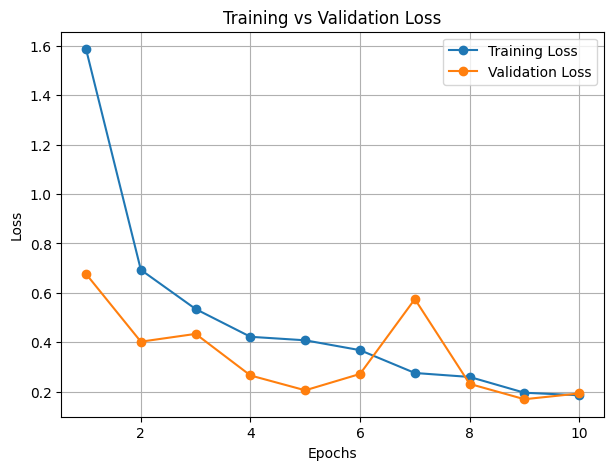

In [22]:
plot_loss_curves(train_losses, val_losses)